# Lunar Phase Predictions

This notebook uses the https://www.weatherapi.com/ API to retreive the tide levels for Phoenix, AZ.  


In [56]:
from datetime import datetime
import dateutil
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

PHASE = {
    "New Moon": 1,
    "Waxing Crescent": 2,
    "First Quarter": 3,
    "Waxing Gibbous": 4,
    "Full Moon": 5,
    "Waning Gibbous": 6,
    "Last Quarter": 7,
    "Waning Crescent": 8,
}

## Retrieve Data

In [72]:
predictions = []
solar = []
    
payload = {
    'key': '',
    'q': 'phoenix',
    'dt': '2023-10-15',
}

year = 2021
date = datetime.strptime(f'{year}-01-01', '%Y-%m-%d')
print('Start data for ' + date.strftime('%Y-%m-%d'))
for i in range(30 * 260):
#for i in range(400):
    date = date + dateutil.relativedelta.relativedelta(days=1)
    if date.year > year:
        print('Retrieving data for ' + str(date.year))
        year = date.year
    payload['dt'] = date.strftime('%Y-%m-%d')
    r = requests.get('http://api.weatherapi.com/v1/astronomy.json', params=payload)
    try:
        current_prediction = PHASE[json.loads(r.text)['astronomy']['astro']['moon_phase']]
    except:
        print(r.text)
    if predictions:
        last_prediction = predictions[-1]
        if current_prediction < last_prediction[1] and current_prediction > 1:
            predictions.append([payload['dt'], last_prediction[1]])
        else:
            predictions.append([payload['dt'], current_prediction])
    else:
        predictions.append([payload['dt'], current_prediction])
    if date.year == 2021:
        solar_date = date.replace(year=2000).strftime('%Y-%m-%d')
        solar.append([solar_date + ' ' + json.loads(r.text)['astronomy']['astro']['sunrise'], 
                      solar_date + ' ' + json.loads(r.text)['astronomy']['astro']['sunset']])


Start data for 2021-01-01
Retrieving data for 2022
Retrieving data for 2023
Retrieving data for 2024
Retrieving data for 2025
Retrieving data for 2026
Retrieving data for 2027
Retrieving data for 2028
Retrieving data for 2029
Retrieving data for 2030
Retrieving data for 2031
Retrieving data for 2032
Retrieving data for 2033
Retrieving data for 2034
Retrieving data for 2035
Retrieving data for 2036
Retrieving data for 2037
Retrieving data for 2038
Retrieving data for 2039
Retrieving data for 2040
Retrieving data for 2041
Retrieving data for 2042


In [78]:
values = list(map(lambda x: float(x[1]), predictions[:100]))
dates = list(map(lambda x: datetime.strptime(x[0], '%Y-%m-%d'), predictions[:100]))

## Plot Results

<IPython.core.display.Javascript object>


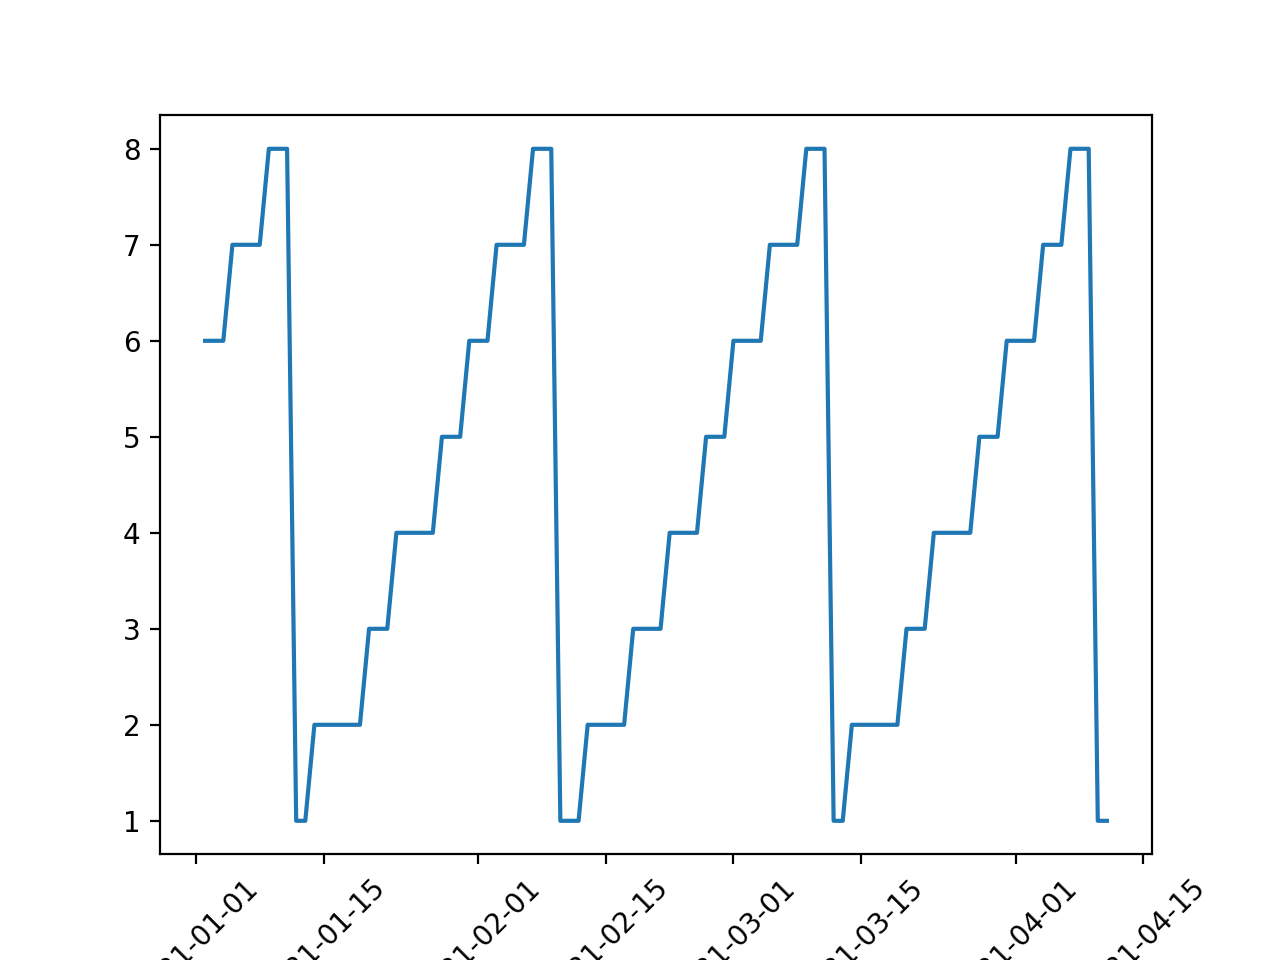

In [79]:
plt.plot(dates, values)
plt.xticks(rotation=45)
plt.show()

## Save Observations

In [80]:
values = list(map(lambda x: float(x[1]), predictions))
dates = list(map(lambda x: datetime.strptime(x[0], '%Y-%m-%d'), predictions))

In [81]:
dataset = pd.DataFrame({'DateTime': dates, 'Height': values})
dataset.to_csv('lunar_phases_phoenix.csv', index=False)

In [82]:
dataset = pd.DataFrame(solar, columns=['sunrise', 'sunset'])
dataset.to_csv('sunriseSunset.csv', index=False)